In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.mixture import GaussianMixture as gmm
import scipy
from matplotlib import pyplot as plt

get_bic = lambda data_in : np.array([gmm(n_components=i+1).fit(data_in).bic(data_in) for i in range(n)])

In [2]:
df = pd.read_csv('../Data/ABIDE_legend_S982.csv') # ABIDE data legend
patients = df['DxGroup'].values==1 # ASD participant indices

dfs = pd.read_csv('../Data/sfari_legend_S121.csv') # SFARI data legend
cnvs = np.array([v in ['16p-deletion','16p-duplication'] for v in dfs['family_type'].values]) #Genotype information

data = np.load('../Data/latent_vecs100.npz') # Latent feature data

In [3]:
%%time
n = 10 # How many clusters to test
i = 100 # How many samples
rep = 1

# BIC for ASD-Specific features
arr_sl = np.zeros((i,n,rep))
for ii in tqdm(range(i)):
    for jj in range(rep):
        mat = np.vstack((data['salient_vec_sfari'][ii,:,:][cnvs,:],data['salient_vec_abide'][ii,:,:][patients,:]))
        arr_sl[ii,:,jj] = get_bic(mat)

# BIC for shared features
arr_bg = np.zeros((i,n,rep))
for ii in tqdm(range(i)):
    for jj in range(rep):
        mat = np.vstack((data['background_vec_sfari'][ii,:,:][cnvs,:],data['background_vec_abide'][ii,:,:][patients,:]))
        arr_bg[ii,:,jj] = get_bic(mat)

# BIC for VAE features
arr_vae = np.zeros((i,n,rep))
for ii in tqdm(range(i)):
    for jj in range(rep):
        mat = np.vstack((data['vae_vec_sfari'][ii,:,:][cnvs,:],data['vae_vec_abide'][ii,:,:][patients,:]))
        arr_vae[ii,:,jj] = get_bic(mat)

100%|██████████| 100/100 [04:15<00:00,  2.56s/it]

CPU times: user 1h 44min 15s, sys: 1h 59min 3s, total: 3h 43min 19s
Wall time: 6min 37s


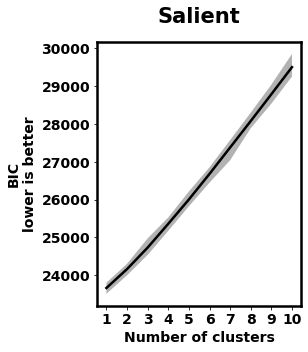

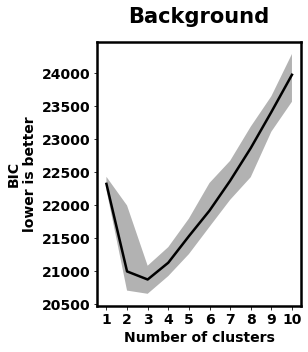

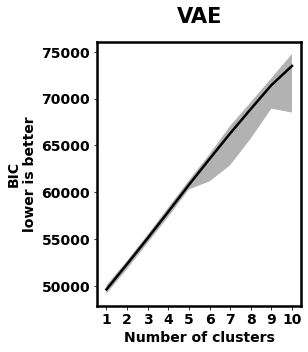

In [4]:
plot_mats = [arr_sl,arr_bg,arr_vae] 
plot_ttls = ['Salient','Background','VAE'] 
for i in range(3):
    plot_mat = plot_mats[i]
    plot_ttl = plot_ttls[i]

    xs = np.arange(n)
    figsize = np.array((185,211))/211*5
    fig,ax = plt.subplots(1,1,figsize=figsize);
    
    m = plot_mat[:,:,0].mean(axis=0)
    se_min = plot_mat[:,:,0].min(axis=0)
    se_max = plot_mat[:,:,0].max(axis=0)
    plt.plot(xs,m,'k-',linewidth=2.5)
    plt.fill_between(xs,y1=se_min,y2=se_max,alpha=.3,facecolor=[0,0,0])


    plt.yticks(fontsize=14,fontweight='bold');
    plt.xticks(xs,labels=xs+1,fontsize=14,fontweight='bold');
    plt.xlabel('Number of clusters',fontsize=14,fontweight='bold')
    plt.ylabel('BIC\nlower is better',fontsize=14,fontweight='bold')

    line_width = 2.5
    for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(line_width)

    plt.title(plot_ttl,fontsize=14*1.5,fontweight='bold',y=1.05)
    plt.tight_layout()